# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import linear_model

In [15]:
df = pd.read_csv('E:\Data\Best Cities for Startups.csv')
df.head(10)

,position,change in position from 2020,city,country,total score,quatity score,quality score,business score,sign of change in position
0,1,0,San Francisco Bay,United States,328.966,29.14,296.02,3.80,NaN
1,2,0,New York,United States,110.777,11.43,95.55,3.80,NaN
2,3,3,Beijing,China,66.049,5.01,58.61,2.43,+
3,4,1,Los Angeles Area,United States,58.441,11.23,43.41,3.80,+
4,5,2,London,United Kingdom,56.913,15.77,37.44,3.70,-
5,6,2,Boston Area,United States,49.835,5.50,40.53,3.80,-
6,7,3,Shanghai,China,42.162,3.57,36.17,2.43,+
7,8,1,Tel Aviv Area,Israel,27.084,4.04,19.92,3.13,-
8,9,0,Moscow,Russia,25.401,7.37,15.64,2.39,NaN
9,10,4,Bangalore,India,25.367,5.04,17.95,2.38,+


In [39]:
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.width', 1000)

In [16]:
df.describe()

,position,total score,quatity score,quality score,business score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,2.433854,0.343920,1.223350,0.867160
std,288.819436,12.055121,1.347019,10.487355,1.148477
min,1.000000,0.037000,0.010000,0.010000,0.000000
25%,250.750000,0.190750,0.020000,0.030000,0.140000
50%,500.500000,0.367000,0.040000,0.040000,0.270000
75%,750.250000,1.362500,0.180000,0.140000,1.030000
max,1000.000000,328.966000,29.140000,296.020000,3.800000


In [18]:
df.shape

(1000, 9)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   position                      1000 non-null   int64  
 1   change in position from 2020  1000 non-null   object 
 2   city                          1000 non-null   object 
 3   country                       1000 non-null   object 
 4   total score                   1000 non-null   float64
 5   quatity score                 1000 non-null   float64
 6   quality score                 1000 non-null   float64
 7   business score                1000 non-null   float64
 8   sign of change in position    798 non-null    object 
dtypes: float64(4), int64(1), object(4)
memory usage: 70.4+ KB


In [23]:
df.isna().sum()

position                          0
change in position from 2020      0
city                              0
country                           0
total score                       0
quatity score                     0
quality score                     0
business score                    0
sign of change in position      202
dtype: int64

In [26]:
df = df.rename(columns = {'sign of change in position':'sign_change_in_position', 'change in position from 2020':'change_in_position','total score':'total_score','quatity score':'quatity_score','quality score':'quality_score','business score':'business_score'})

In [27]:
df["sign_change_in_position"] = df["sign_change_in_position"].replace(np.nan,0)
df['change_in_position'] = df['change_in_position'].replace(['new'],'0')
df["sign_change_in_position"] = df["sign_change_in_position"].replace(['+'],1)
df["sign_change_in_position"] = df["sign_change_in_position"].replace(['-'],-1)

In [28]:
print(df.columns.tolist())
print(df.info())

['position', 'change_in_position', 'city', 'country', 'total_score', 'quatity_score', 'quality_score', 'business_score', 'sign_change_in_position']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   position                 1000 non-null   int64  
 1   change_in_position       1000 non-null   object 
 2   city                     1000 non-null   object 
 3   country                  1000 non-null   object 
 4   total_score              1000 non-null   float64
 5   quatity_score            1000 non-null   float64
 6   quality_score            1000 non-null   float64
 7   business_score           1000 non-null   float64
 8   sign_change_in_position  1000 non-null   int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 70.4+ KB
None


In [32]:
df.head(15)

,position,change_in_position,city,country,total_score,quatity_score,quality_score,business_score,sign_change_in_position
0,1,0,San Francisco Bay,United States,328.966,29.14,296.02,3.80,0
1,2,0,New York,United States,110.777,11.43,95.55,3.80,0
2,3,3,Beijing,China,66.049,5.01,58.61,2.43,1
3,4,1,Los Angeles Area,United States,58.441,11.23,43.41,3.80,1
4,5,2,London,United Kingdom,56.913,15.77,37.44,3.70,-1
5,6,2,Boston Area,United States,49.835,5.50,40.53,3.80,-1
6,7,3,Shanghai,China,42.162,3.57,36.17,2.43,1
7,8,1,Tel Aviv Area,Israel,27.084,4.04,19.92,3.13,-1
8,9,0,Moscow,Russia,25.401,7.37,15.64,2.39,0
9,10,4,Bangalore,India,25.367,5.04,17.95,2.38,1


In [35]:
df.loc[0:10, ["city", "total_score"]]

,city,total_score
0,San Francisco Bay,328.966
1,New York,110.777
2,Beijing,66.049
3,Los Angeles Area,58.441
4,London,56.913
5,Boston Area,49.835
6,Shanghai,42.162
7,Tel Aviv Area,27.084
8,Moscow,25.401
9,Bangalore,25.367


In [36]:
dfg= df.groupby('country').count()
dfg.iloc[:,[2]]

,city
country,
Afghanistan,1
Albania,1
Algeria,1
Andorra,1
Angola,1
...,...
Venezuela,1
Vietnam,2
Yemen,1


In [37]:
countries = df.country.unique()
print(len(countries))

140


In [40]:
df.country.value_counts()

 United States                       267
 United Kingdom                       58
 India                                43
 Germany                              42
 China                                40
 Italy                                34
 Brazil                               32
 Canada                               30
 Spain                                28
 France                               24
 The Netherlands                      22
 Mexico                               17
 Russia                               16
 Poland                               14
 Switzerland                          14
 Australia                            12
 Israel                               11
 Sweden                               10
 Belgium                               9
 Turkey                                9
 Japan                                 8
 Pakistan                              7
 Denmark                               7
 Nigeria                               7
 Romania        

In [43]:
df.iloc[df['position'].idxmax()]

position                     1000
change_in_position              0
city                        Sanaa
country                     Yemen
total_score                 0.037
quatity_score                0.01
quality_score                0.02
business_score               0.01
sign_change_in_position         0
Name: 999, dtype: object

In [42]:
df.iloc[df['position'].idxmin()]

position                                   1
change_in_position                         0
city                       San Francisco Bay
country                        United States
total_score                          328.966
quatity_score                          29.14
quality_score                         296.02
business_score                           3.8
sign_change_in_position                    0
Name: 0, dtype: object

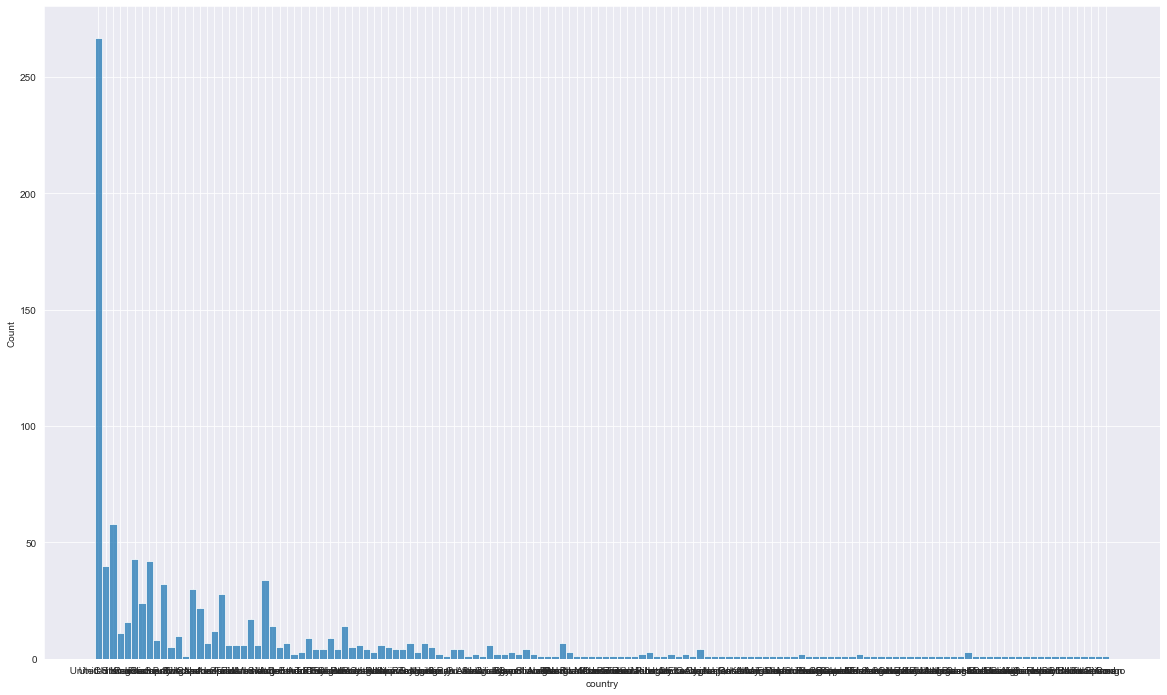

In [49]:
plt.figure(figsize= (20,12))
sns.histplot(df.country)
plt.show()

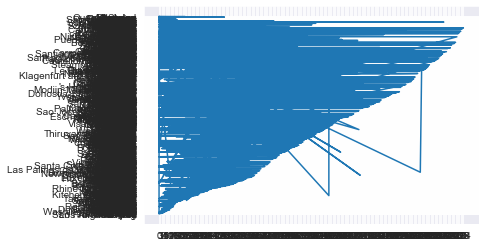

In [51]:
plt.figure(figsize= (20,12))
plt.plot(df['change_in_position'], df['city'])
plt.show()

In [52]:
df_data = df.iloc[:, 4:8]

df_target = df.loc[: ,['sign_change_in_position']]


In [53]:
X_train,X_test,Y_train,Y_test = train_test_split(df_data, df_target, train_size=0.8)

In [11]:
model = tree.DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(df_data, df_target)

DecisionTreeClassifier(max_depth=3, random_state=42)

[Text(558.0, 570.7800000000001, 'X[1] <= 0.025\ngini = 0.64\nsamples = 1000\nvalue = [414, 202, 384]'),
 Text(279.0, 407.70000000000005, 'X[2] <= 0.025\ngini = 0.655\nsamples = 343\nvalue = [107, 143, 93]'),
 Text(139.5, 244.62, 'X[0] <= 0.119\ngini = 0.616\nsamples = 153\nvalue = [63, 67, 23]'),
 Text(69.75, 81.53999999999996, 'gini = 0.604\nsamples = 41\nvalue = [9, 22, 10]'),
 Text(209.25, 81.53999999999996, 'gini = 0.593\nsamples = 112\nvalue = [54, 45, 13]'),
 Text(418.5, 244.62, 'X[0] <= 0.275\ngini = 0.651\nsamples = 190\nvalue = [44, 76, 70]'),
 Text(348.75, 81.53999999999996, 'gini = 0.659\nsamples = 147\nvalue = [41, 59, 47]'),
 Text(488.25, 81.53999999999996, 'gini = 0.553\nsamples = 43\nvalue = [3, 17, 23]'),
 Text(837.0, 407.70000000000005, 'X[2] <= 0.025\ngini = 0.577\nsamples = 657\nvalue = [307, 59, 291]'),
 Text(697.5, 244.62, 'X[3] <= 0.155\ngini = 0.512\nsamples = 52\nvalue = [34, 10, 8]'),
 Text(627.75, 81.53999999999996, 'gini = 0.615\nsamples = 26\nvalue = [12, 10

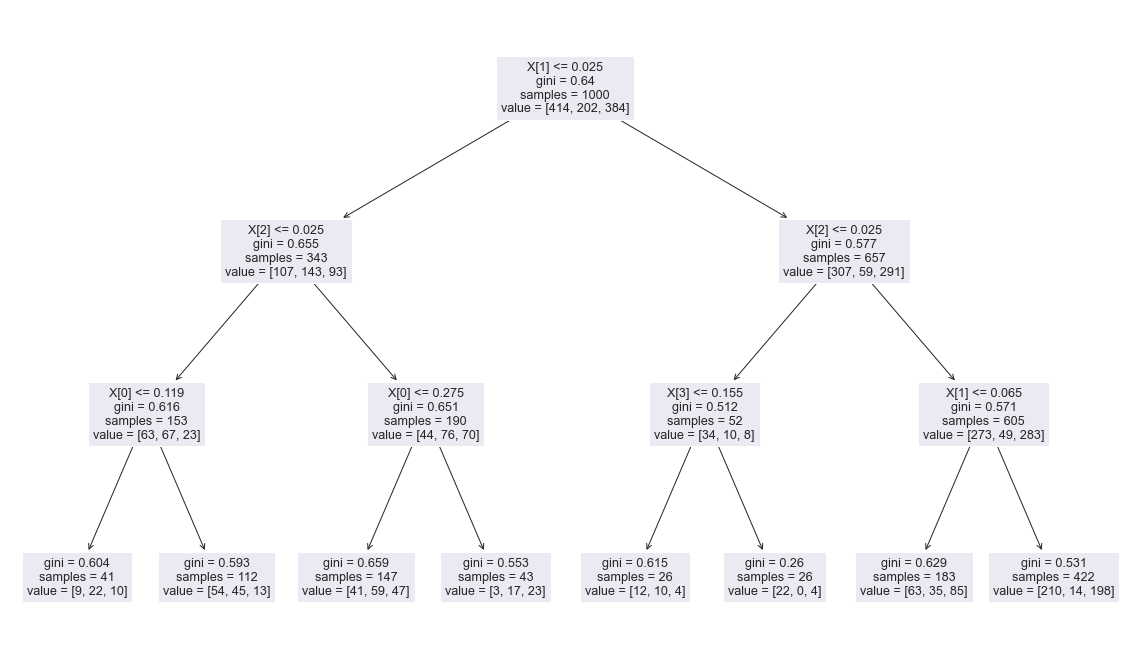

In [54]:
plt.figure(figsize= (20,12))
tree.plot_tree(model)

In [55]:
model.score(df_data,df_target)

0.487

In [72]:
x = df.total_score

y = df.sign_change_in_position

In [68]:
reg.predict([[5,8,3,1]])

array([[42.641646]])

In [69]:
y_pred = reg.predict(df_data)

In [74]:
from sklearn.neighbors import kNeighborsClassifier

knn = kNeighborsClassifier(n_neighbor= 5)

ImportError: cannot import name 'kNeighborsClassifier' from 'sklearn.neighbors' (C:\Users\Danish Iqbal\anaconda3\lib\site-packages\sklearn\neighbors\__init__.py)

In [77]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()

In [78]:
NB.fit(df_data, df_target)

C:\Users\Danish Iqbal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GaussianNB()

In [79]:
NB.score(df_data, df_target)

0.431

ValueError: Expected 2D array, got scalar array instead:
array=1.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.